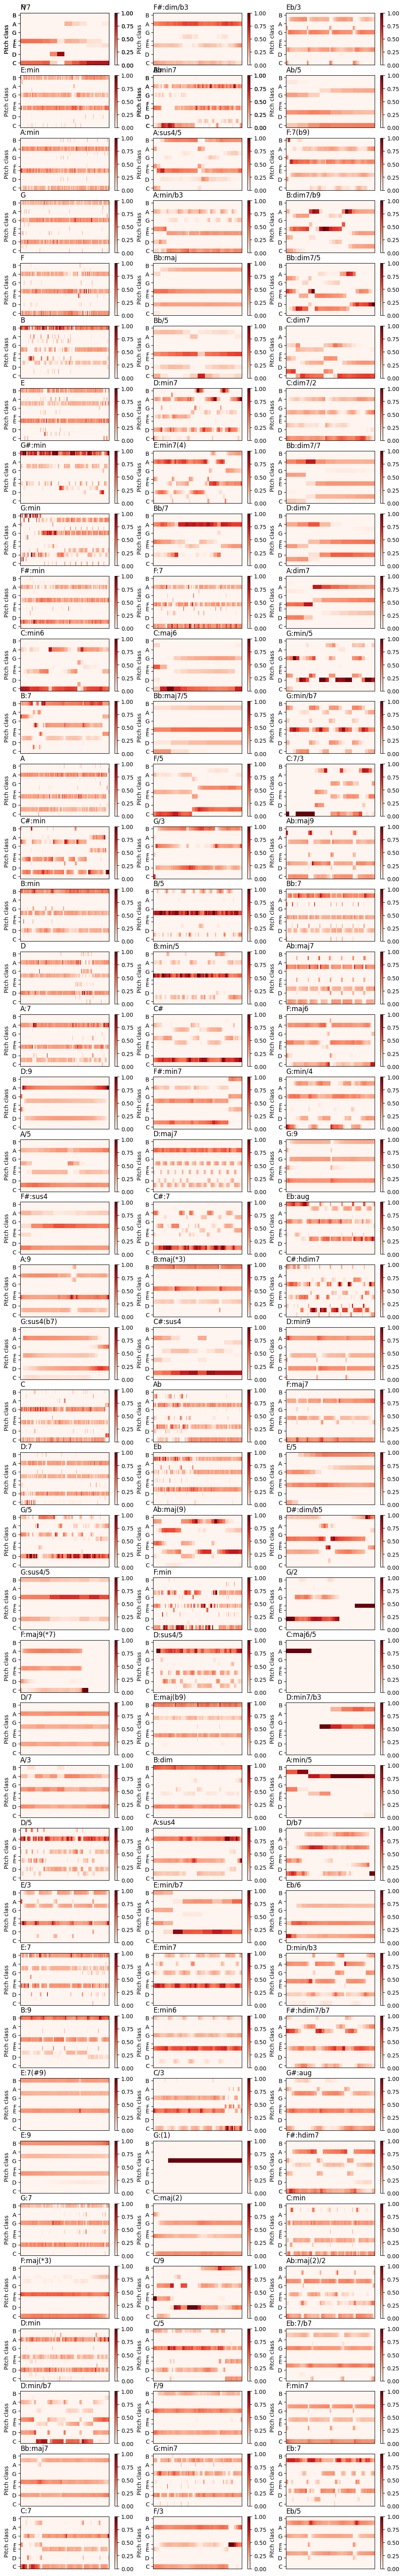

In [7]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import dataloader
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ipywidgets import interactive
import circularPitchSpace as cps
import matplotlib.gridspec as gridspec
import features
import librosa.display
import pickle

file_path = "/home/max/ET-TI/Masterarbeit/datasets/beatles/chroma/1_deep_chroma.pkl"
with open(file_path, "rb") as f:
    df = pickle.load(f)
labels = df['label'].unique().tolist()
chords = labels

# display features
fig = plt.figure(figsize=(12, int(len(chords)/3)*2))
gs = gridspec.GridSpec(int(len(chords)/3), 3)
for i,label in enumerate(chords):
    selected_df = df[df['label'] == label]
    selected_df = selected_df.drop('label', axis=1).astype(float)
    chroma = np.array(selected_df)
    # Filtering
    if i < len(chords)/3:
        row = 0
    elif i > len(chords)/3 and i < len(chords)* 2/3:
        row = 1
    else:
        row = 2
    ax = fig.add_subplot(gs[i%int(len(chords)/3),row])
    try:
        img = librosa.display.specshow(chroma.T, y_axis='chroma', cmap="Reds", ax=ax, vmin=0, vmax=1)
        ax.set_title(label, loc="left")
        cbar = fig.colorbar(img, ax=ax)
    except Exception as e:
        continue
